<a href="https://colab.research.google.com/github/marielalvarez/actividad5/blob/main/assignment01_pandas_uci_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most of this activity is taken from:
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('./adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?**

In [ ]:
# You code here
data['sex'].value_counts()

,count
sex,
Male,21790
Female,10771


**2. What is the average age (*age* feature) of women?**

In [ ]:
# You code here
import math
womenage_avg = data[data['sex'] == 'Female']['age'].mean()
print(f'{math.floor(womenage_avg)}')

36


**3. What is the percentage of German citizens (*native-country* feature)?**

In [ ]:
# You code here
german_per = data['native-country'].value_counts(normalize=True)['Germany']
print(f'{german_per * 100:.2f}%')

0.42%


4-5. __What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?__

In [ ]:
# You code here
data.groupby('salary')['age'].mean()

,age
salary,
<=50K,36.783738
>50K,44.249841


In [ ]:
# You code here
data.groupby('salary')['age'].std()

,age
salary,
<=50K,14.020088
>50K,10.519028


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [ ]:
# You code here
allowed_education = {"Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"}
high_income = data[data['salary'] == '>50K']
high_income['education'].isin(allowed_education).all()


False

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [ ]:
# You code here
race_sex = data.groupby(['race', 'sex'])['age'].describe()
race_sex.loc[('Amer-Indian-Eskimo', 'Male'), 'max']


82.0

**8. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [ ]:
# You code here
max_hours = data['hours-per-week'].max()
max_hours_people = data[data['hours-per-week'] == max_hours]

salary_counts = max_hours_people['salary'].value_counts(normalize=True) * 100
print(f'{salary_counts.loc[">50K"]:.2f}%')

29.41%


**9. Find the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [ ]:
# You code here
japan_data = data[data['native-country'] == 'Japan']

japan_data.groupby('salary')['hours-per-week'].mean()

,hours-per-week
salary,
<=50K,41.000000
>50K,47.958333


__10. Create 2 visualizations (what to plot is up to you) and write the conclusions generated with those plots from the dataset__

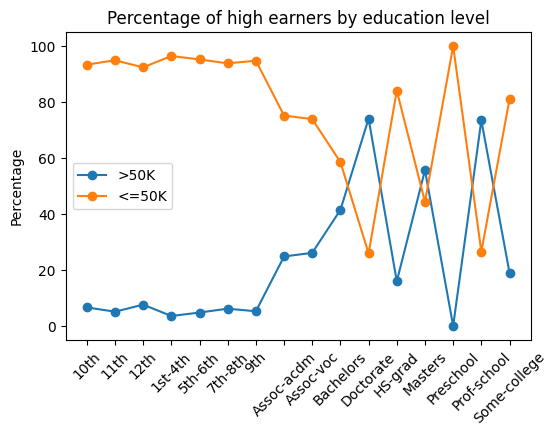

In [ ]:
# Your code here: PLOT 1
cross_tab = pd.crosstab(data['education'], data['salary'], normalize='index') * 100

plt.figure(figsize=(6,4))
plt.plot(cross_tab.index, cross_tab['>50K'], marker='o', label=">50K")
plt.plot(cross_tab.index, cross_tab['<=50K'], marker='o', label="<=50K")
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.title("Percentage of high earners by education level")
plt.legend()
plt.show()


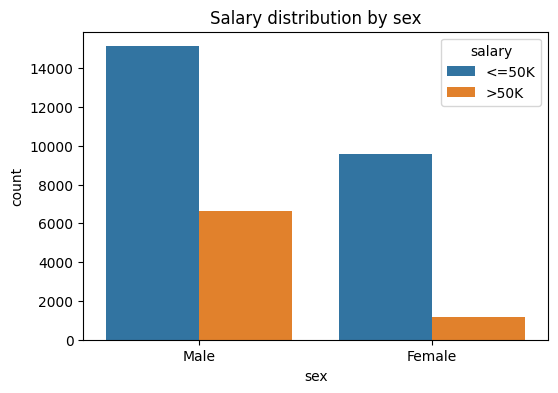

In [ ]:
# Your code here: PLOT 2
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='sex', hue='salary')
plt.title("Salary distribution by sex")
plt.show()


In [ ]:
conclusion1 = (
    "From PLOT 1, we can infer that higher education levels significantly increase "
    "the proportion of people earning more than $50K, especially from associate degrees onward. "
    "In contrast, individuals earning $50K or less (orange line) remain dominant at lower education levels, "
    "particularly from preschool to high school."
)
print(conclusion1)

conclusion2 = (
    "PLOT 2 reaffirms the general knowledge that men tend to earn more than women. "
    "The vast majority of females in this dataset earn <=50K, with only a small proportion earning above $50K, "
    "evidencing a possible gender pay gap."
)
print(conclusion2)


From PLOT 1, we can infer that higher education levels significantly increase the proportion of people earning more than $50K, especially from associate degrees onward. In contrast, individuals earning $50K or less (orange line) remain dominant at lower education levels, particularly from preschool to high school.
PLOT 2 reaffirms the general knowledge that men tend to earn more than women. The vast majority of females in this dataset earn <=50K, with only a small proportion earning above $50K, evidencing a possible gender pay gap.
